In [4]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
data = pd.read_csv('book.csv')

In [3]:
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
data.shape

(2000, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [8]:
data.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [10]:
data.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

In [12]:
#apriori Algorithms
frequent_items = apriori(data,min_support=.1,use_colnames=True) 
frequent_items['length']=frequent_items['itemsets'].apply(lambda x:len(x))
     

C:\Users\LENOVO\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [13]:
frequent_items

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [14]:
rules=association_rules(frequent_items,metric = 'lift' ,min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [15]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


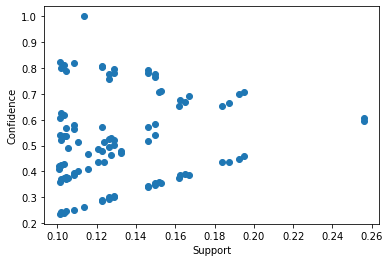

In [18]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [20]:
frequent_items1 = apriori(data,min_support=.150,use_colnames=True)
frequent_items1['length']=frequent_items1['itemsets'].apply(lambda x:len(x))

C:\Users\LENOVO\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [21]:
frequent_items1

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1650,"(YouthBks, ChildBks)",2
8,0.2560,"(CookBks, ChildBks)",2
9,0.1840,"(DoItYBks, ChildBks)",2


In [23]:
rules1=association_rules(frequent_items1,metric = 'lift' ,min_threshold=0.9)
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


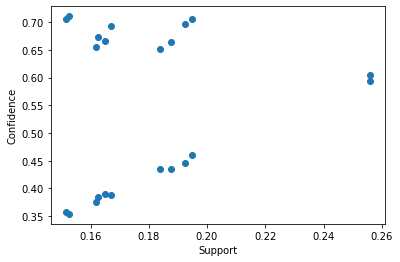

In [24]:
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [25]:
frequent_items2 = apriori(data,min_support=.170,use_colnames=True)
frequent_items2['length']=frequent_items2['itemsets'].apply(lambda x:len(x))

C:\Users\LENOVO\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [26]:
frequent_items2

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(CookBks, ChildBks)",2
8,0.1840,"(DoItYBks, ChildBks)",2
9,0.1950,"(GeogBks, ChildBks)",2


In [27]:
rules2=association_rules(frequent_items2,metric = 'lift' ,min_threshold=0.8)

rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(ChildBks),(DoItYBks),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770
4,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
5,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
6,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
7,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875
8,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
9,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361


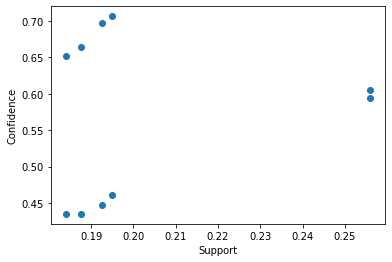

In [28]:
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()